In [1]:
# Predicting average of sin(t), cos(t), and sin(t - π/2)

In [2]:
import time
import tensorflow as tf
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import numpy as np
from numpy import newaxis
import matplotlib.pyplot as plt

Using TensorFlow backend.


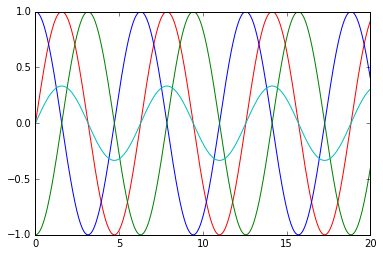

In [3]:
def sin(t):
    return np.sin(t)

def cos(t):
    return np.cos(t)

def sin_shifted(t):
    return np.sin(t - (np.pi / 2))

# 0 to 20 for multiple periods
t = np.linspace(0, 20, 5000)

sin_wave = np.array(sin(t))
cos_wave = np.array(cos(t))
sin_shifted_wave = np.array(sin_shifted(t))

avg_wave = (0.333333333333333333333) * (sin_wave + cos_wave + sin_shifted_wave)
    
plt.cla()
plt.plot(t, sin_wave, "r-")
plt.plot(t, cos_wave, "b-")
plt.plot(t, sin_shifted_wave, "g-")
plt.plot(t, avg_wave, "c-")
plt.show()


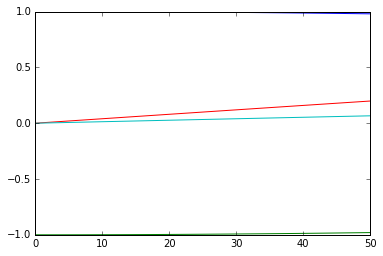

In [4]:
# Create training dataset by appending batches of 51 datapoints to arrays
seq_len = 50
sequence_length = seq_len + 1
x_train_sin = []
x_train_cos = []
x_train_sin_two = []
y_train = []
for index in range(len(sin_wave) - sequence_length):
    x_train_sin.append(sin_wave[index: index + sequence_length])
    x_train_cos.append(cos_wave[index: index + sequence_length])
    x_train_sin_two.append(sin_shifted_wave[index: index + sequence_length])
    y_train.append(avg_wave[index: index + sequence_length])

# Convert Python lists to NumPy arrays
x_train_sin = np.array(x_train_sin)
x_train_cos = np.array(x_train_cos)
x_train_sin_two = np.array(x_train_sin_two)
y_train = np.array(y_train)

t_two = np.linspace(0, 50, 51)

plt.cla()
plt.plot(t_two, x_train_sin[0], "r-")
plt.plot(t_two, x_train_cos[0], "b-")
plt.plot(t_two, x_train_sin_two[0], "g-")
plt.plot(t_two, y_train[0], "c-")
plt.show()


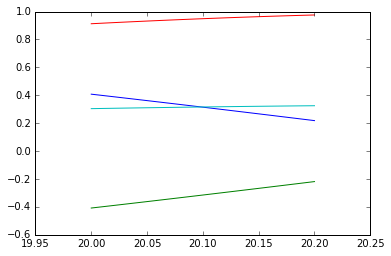

In [5]:
# Reshape to get x_train.shape = (4949, 51, 3)
x_train_sin = np.squeeze(x_train_sin)
x_train_cos = np.squeeze(x_train_cos)
x_train_sin_two = np.squeeze(x_train_sin_two)

x_train_sin = np.expand_dims(x_train_sin, axis=-1)
x_train_cos = np.expand_dims(x_train_cos, axis=-1)
x_train_sin_two = np.expand_dims(x_train_sin_two, axis=-1)

x_train = np.concatenate((x_train_sin, x_train_cos, x_train_sin_two), axis=-1)


# Generate test data
t_three = np.linspace(20, 40, 5000)
t_three = t_three[0:51]

x_test_sin = []
x_test_cos = []
x_test_sin_two = []
y_test = []

x_test_sin.append(sin(t_three))
x_test_sin = np.array(x_test_sin)
x_test_cos.append(cos(t_three))
x_test_cos = np.array(x_test_cos)
x_test_sin_two.append(sin_shifted(t_three))
x_test_sin_two = np.array(x_test_sin_two)
y_test.append((0.333333333333333333333) * (x_test_sin + x_test_cos + x_test_sin_two))
y_test = np.array(y_test)

sin = np.squeeze(x_test_sin)
cos = np.squeeze(x_test_cos)
sin_two = np.squeeze(x_test_sin_two)
avg = np.squeeze(y_test)

x_test_sin = np.expand_dims(x_test_sin, axis=-1)
x_test_cos = np.expand_dims(x_test_cos, axis=-1)
x_test_sin_two = np.expand_dims(x_test_sin_two, axis=-1)
x_test = np.concatenate((x_test_sin, x_test_cos, x_test_sin_two), axis=-1)

plt.cla()
plt.plot(t_three, sin, "r-")
plt.plot(t_three, cos, "b-")
plt.plot(t_three, sin_two, "g-")
plt.plot(t_three, avg, "c-")
plt.show()

In [6]:
def build_model(layers):
    
    model = Sequential()
    
    model.add(LSTM(
        input_dim = layers[0],
        output_dim = layers[1],
        return_sequences = True))
    model.add(Dropout(0.2))
    
    model.add(LSTM(
        layers[2],
        return_sequences = False))
    model.add(Dropout(0.2))
    
    model.add(Dense(
        output_dim = layers[3]))
    model.add(Activation("linear"))
    
    model.compile(loss="mse", optimizer="rmsprop")
    
    # try changing whether there is dropout, activation function, loss function, number of layers, in/out of layers
    
    return model

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(units=500, return_sequences=True, input_shape=(None, 3))`
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=51)`
/home/arjung2/.local/lib/python2.7/site-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 4454 samples, validate on 495 samples
Epoch 1/100
4454/4454 [==============================] - 5s 1ms/step - loss: 0.1801 - val_loss: 0.0026
Epoch 2/100
4454/4454 [==============================] - 2s 434us/step - loss: 0.0058 - val_loss: 8.1512e-04
Epoch 3/100
4454/4454 [==============================] - 2s 424us/step - loss: 0.0055 - val_loss: 0.0013
Epoch 4/100
4454/4454 [==============================] - 2s 440us/step - loss: 0.0052 - val_loss: 0.0011
Epoch 5/100
4454/4454 [==============================] - 2s 418us/step - loss: 0.0052 - val_loss: 0.0018
Epoch 6/100
4454/4454 [==============================] - 2s 483us/step - loss: 0.0050 - val_loss: 0.0017
Epoch 7/100
4454/4454 [==============================] - 2s 459us/step - loss: 0.0057 - val_loss: 0.0049
Epoch 8/100
4454/4454 [==============================] - 2s 416us/step - loss: 0.0051 - val_loss: 0.0013
Epoch 9/100
4454/4454 [==============================] - 2s 433us/step - loss: 0.0046 - val_loss: 0.0037
Epoch 

Epoch 75/100
4454/4454 [==============================] - 2s 421us/step - loss: 0.0010 - val_loss: 2.6449e-04
Epoch 76/100
4454/4454 [==============================] - 2s 426us/step - loss: 3.7913e-04 - val_loss: 3.8063e-05
Epoch 77/100
4454/4454 [==============================] - 2s 470us/step - loss: 8.5099e-04 - val_loss: 3.8807e-04
Epoch 78/100
4454/4454 [==============================] - 2s 427us/step - loss: 5.3004e-04 - val_loss: 3.6402e-05
Epoch 79/100
4454/4454 [==============================] - 2s 420us/step - loss: 7.3939e-04 - val_loss: 3.9701e-04
Epoch 80/100
4454/4454 [==============================] - 2s 435us/step - loss: 5.0160e-04 - val_loss: 1.4730e-04
Epoch 81/100
4454/4454 [==============================] - 2s 448us/step - loss: 8.3402e-04 - val_loss: 6.3099e-04
Epoch 82/100
4454/4454 [==============================] - 2s 458us/step - loss: 4.8396e-04 - val_loss: 8.5972e-05
Epoch 83/100
4454/4454 [==============================] - 2s 467us/step - loss: 6.9692e-04 -

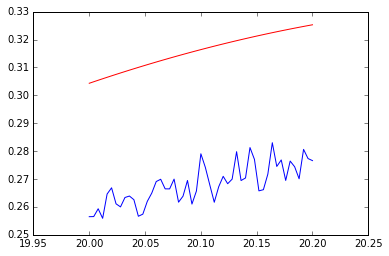

In [7]:
epochs = 100

model = build_model([3, 500, 500, 51])

model.fit(x_train,
          y_train,
          batch_size=512,
          nb_epoch=epochs,
          validation_split=0.1)

predicted = model.predict(x_test)

y_test_new = np.squeeze(y_test)
y_predicted = np.squeeze(predicted)
plt.plot(t_three, y_test_new, "r-")
plt.plot(t_three, y_predicted, "b-")